# Pymaceuticals Inc.
---

### Analysis

Capomulin was one of the most effective regimen in reducing the tumor size. The correlation coefficient of 0.877 which is closer to 1 means there is a strong positive correlation between average tumor volume and weight of mice that were under the Capomulin regimen, this is also represented in the "WEIGHT VS. AVERAGE TUMOR VOLUME - CAPOMULIN REGIMEN" graph as both variables visibly increased, the data moves in a positive direction in the first quadrant of the graph and if there was data involving the third quadrant would have followed the same patter. According to the data the Ramicane regime was also effective reducing the tumor volume as can be seen in both box plots as well as it is evident in the linear regression plots. 

In [2685]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='left')
# Display the data table for preview
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2686]:
# Checking the number of mice.
mouse_count = len(complete_data_df['Mouse ID'].unique())
mouse_count

249

In [2687]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id_timepoint = round(complete_data_df[complete_data_df.duplicated(['Mouse ID','Timepoint'])],2)
print("Duplicate mice by ID number for Mouse ID and Timepoing")
duplicate_mouse_id_timepoint

Duplicate mice by ID number for Mouse ID and Timepoing


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [2688]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = round(complete_data_df.loc[complete_data_df['Mouse ID'] == 'g989', :],2)
print(f"Duplicate mouse count {len(duplicate_mouse_ids)}")
duplicate_mouse_ids

Duplicate mouse count 13


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [2689]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
clean_df = round(complete_data_df.drop_duplicates(subset=['Mouse ID'], keep='last'),2)   
print("Clean dataframe excluding duplicates")
clean_df

Clean dataframe excluding duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.05,1
19,s185,Capomulin,Female,3,17,45,23.34,1
29,x401,Capomulin,Female,16,15,45,28.48,0
39,m601,Capomulin,Male,22,17,45,28.43,1
49,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.93,0
1862,z435,Propriva,Female,12,26,10,48.71,0
1872,z581,Infubinol,Female,24,25,45,62.75,3
1882,z795,Naftisol,Female,13,29,45,65.74,3


In [2690]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df_count = len(clean_df)
print("Count of mice in the clean DataFramce ")
mice_clean_df_count

Count of mice in the clean DataFramce 


249

## Summary Statistics

In [2691]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# The sem() method calculates the standard error of the mean for each column.

summary_table = pd.DataFrame({
    'mean':clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].round(2),
    'median':clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].round(2),
    'var':clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].round(2),
    'std':clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].round(2),
    'sem':clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].round(2),
})
# summary_table.set_caption("Tumor Volume (mm3)")

print("Summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen")
summary_table

Summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.67,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.02,8.60,1.72
Ketapril,62.81,64.49,98.93,9.95,1.99
Naftisol,61.21,63.28,106.02,10.30,2.06
Placebo,60.51,62.03,78.77,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.20,90.34,9.50,1.94


In [2692]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_table_agggregation = round(clean_df.groupby(('Drug Regimen'))[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem']),2)
print("Summary table using generated using the aggregation method")
summary_table_agggregation

Summary table using generated using the aggregation method


Tumor Volume (mm3)                            
                           mean median     var    std   sem
Drug Regimen                                               
Capomulin                 36.67  38.13   32.67   5.72  1.14
Ceftamin                  57.75  59.85   69.98   8.37  1.67
Infubinol                 58.18  60.17   74.02   8.60  1.72
Ketapril                  62.81  64.49   98.93   9.95  1.99
Naftisol                  61.21  63.28  106.02  10.30  2.06
Placebo                   60.51  62.03   78.77   8.87  1.77
Propriva                  56.74  55.84   69.35   8.33  1.67
Ramicane                  36.19  36.56   32.17   5.67  1.13
Stelasyn                  61.00  62.20   90.34   9.50  1.94
Zoniferol                 59.18  61.84   76.85   8.77  1.75

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Per Drug Regimen'}, xlabel='Drug Name', ylabel='Number of Mice'>

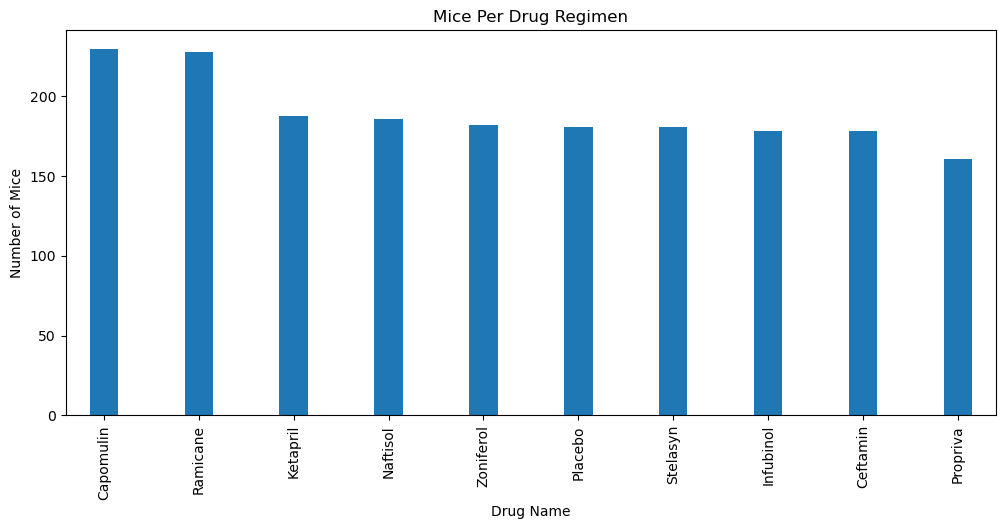

In [2693]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot = complete_data_df['Drug Regimen'].value_counts().plot(kind='bar', width=.3, figsize = \
            (12, 5), xlabel='Drug Name', ylabel='Number of Mice', title='Mice Per Drug Regimen') 
pandas_plot

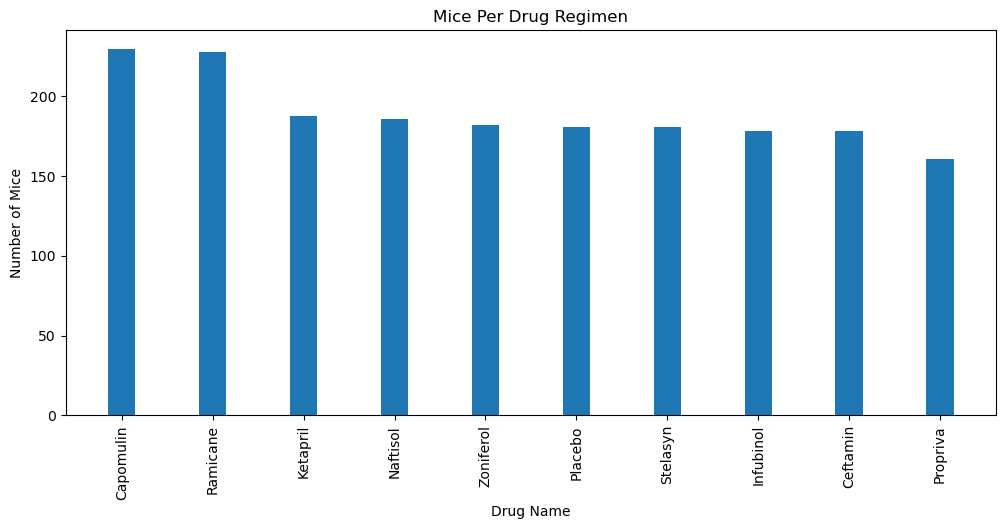

In [2694]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
singleColumn = complete_data_df['Drug Regimen'].value_counts()
fig = plt.figure(figsize = (12, 5))
plt.bar(singleColumn.index.values, singleColumn.values, width=.3 )
plt.title('Mice Per Drug Regimen')
plt.xlabel('Drug Name',)
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, xlabel='<  SEX  >'>

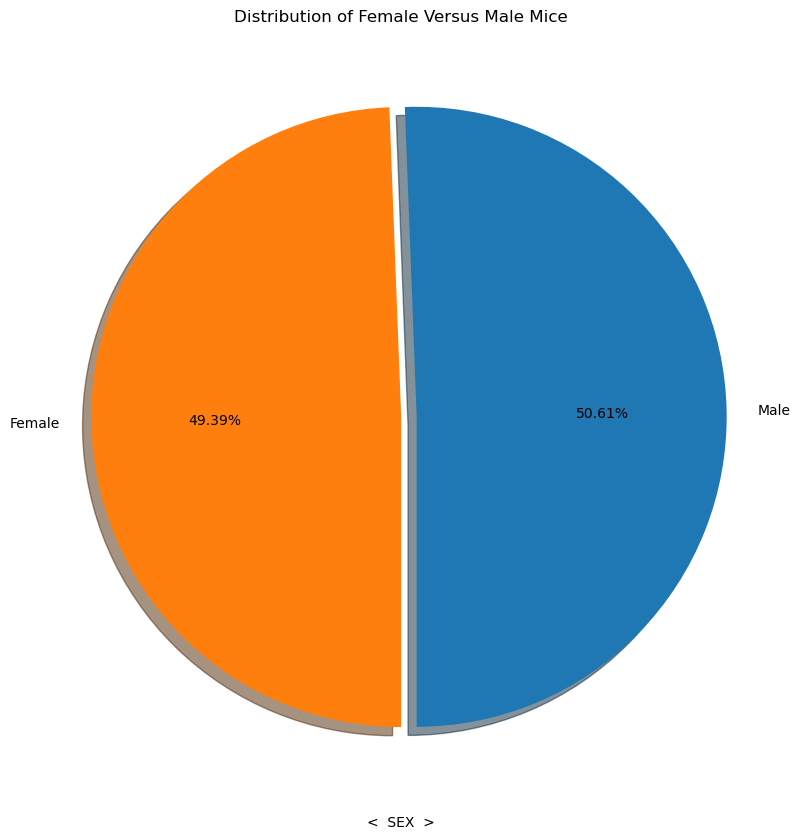

In [2695]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas 
# https://www.python-graph-gallery.com/140-basic-pieplot-with-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html 
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pandas_pie_plot = complete_data_df['Sex'].value_counts().plot(kind='pie',  figsize = (10, 15), \
                title='Distribution of Female Versus Male Mice', autopct='%.2f%%', explode= [0.05,0], shadow=True, startangle=270)
pandas_pie_plot.set_xlabel("<  SEX  >") 
pandas_pie_plot.set_ylabel("") 
pandas_pie_plot

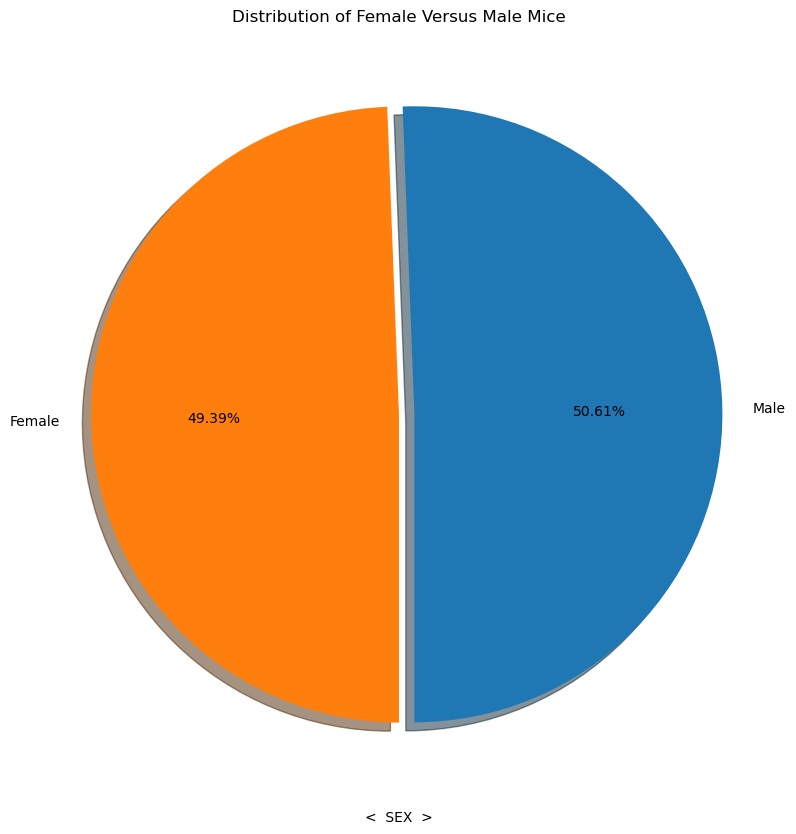

In [2696]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot  
# https://www.w3schools.com/python/matplotlib_pie_charts.asp 
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
sexColumn = complete_data_df['Sex'].value_counts()
fig = plt.figure(figsize = (10, 10))
plt.pie([sexColumn['Male'],sexColumn['Female']], labels=['Male', 'Female'], autopct='%1.2f%%', explode= [0.05,0], shadow=True,startangle=270)
plt.title('Distribution of Female Versus Male Mice')
plt.xlabel('<  SEX  >')
plt.show()

## Quartiles, Outliers and Boxplots

In [2697]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_per_mouse_id = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
# greatest_timepoint_per_mouse_id
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint_per_mouse_id, complete_data_df, on=['Mouse ID','Timepoint'], how='left')
# tumor_volume_df
only_four_drugs_rows_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# complete_data_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
only_four_drugs_rows_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [2698]:
"""
https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
https://www.scribbr.com/statistics/quartiles-quantiles/ https://tinyurl.com/32bht394 
IQQ is the interquantile range of a data set
https://tinyurl.com/2cwm5hwb https://www.scribbr.com/statistics/quartiles-quantiles/
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal
range = MAX - MIN 
"""
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = sorted(list(set([x for x in clean_df['Drug Regimen']])))
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliersValues = {}
dict_of_values = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. # Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in four_treatments:
    key1 = drug.lower() + '_data'
    key2 = drug.lower() + '_data_tumor_volume'
    key3 = drug.lower() + '_quartile'
    key4 = drug.lower() + '_quartile_lower'
    key5 = drug.lower() + '_quartile_upper'
    key6 = drug.lower() + '_IRQ'
    key7 = drug.lower() + '_lower_bound'
    key8 = drug.lower() + '_upper_bound'
    
    data = only_four_drugs_rows_df.loc[only_four_drugs_rows_df['Drug Regimen'] ==  drug]
    data_tumor_volume = data['Tumor Volume (mm3)']

    quartile = data['Tumor Volume (mm3)'].quantile([.25,.5,.75], interpolation='nearest')
    
    quartile_lower = quartile[0.25]

    quartile_upper = quartile[0.75]

    irq = round(quartile_upper - quartile_lower , 2)
    upper_bound = round(quartile_upper + (1.5 * irq), 2)
    lower_bound = round(quartile_lower-(1.5 * irq), 2)

    dict_of_values.update({
        key1 : data,
        key2 : data_tumor_volume,
        key3 : quartile,
        key4 : quartile_lower,
        key5 : quartile_upper,
        key6 : irq,
        key7 : lower_bound,
        key8 : upper_bound
    })
    outliersValues.update({drug: [lower_bound,upper_bound]}) 

for treatment in treatment_list:
    if not treatment in outliersValues.keys():
        continue
    else:
        print(f"Potential outliers for {treatment} could be between the values\
 below {outliersValues[treatment][0]} and above {outliersValues[treatment][1]}" )

Potential outliers for Capomulin could be between the values below 20.71 and above 51.83
Potential outliers for Ceftamin could be between the values below 25.35 and above 87.67
Potential outliers for Infubinol could be between the values below 36.83 and above 82.75
Potential outliers for Ramicane could be between the values below 17.91 and above 54.31


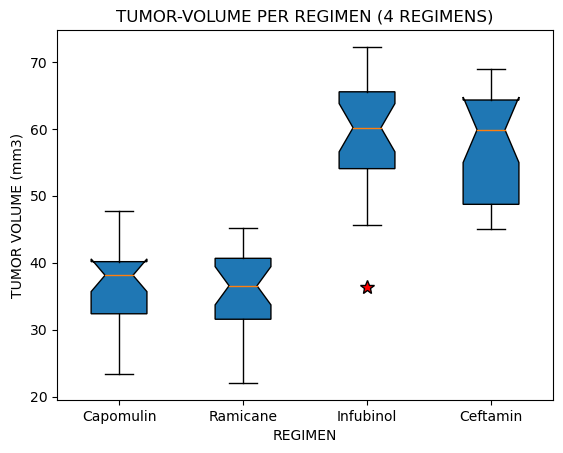

In [2699]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group, 4 treatments
for drug in four_treatments:
    tumor_vol_data.append(dict_of_values[drug.lower() + '_data_tumor_volume'])
plt.boxplot(tumor_vol_data, labels = four_treatments, notch=True, showfliers=True, patch_artist=True,flierprops={'marker': '*', 'markersize': 10, 'markerfacecolor': 'red'}) 
plt.ylabel('TUMOR VOLUME (mm3)')
plt.xlabel('REGIMEN')
plt.title('TUMOR-VOLUME PER REGIMEN (4 REGIMENS)')
plt.show()

In [2700]:
# all_drugs
all_drugs_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(treatment_list)]
all_tumor_vol_data = []
all_outliersValues = {}
all_dict_of_values = {}
for drug in treatment_list:
    key1 = drug.lower() + '_data'
    key2 = drug.lower() + '_data_tumor_volume'
    key3 = drug.lower() + '_quartile'
    key4 = drug.lower() + '_quartile_lower'
    key5 = drug.lower() + '_quartile_upper'
    key6 = drug.lower() + '_IRQ'
    key7 = drug.lower() + '_lower_bound'
    key8 = drug.lower() + '_upper_bound'
    
    data = all_drugs_df.loc[all_drugs_df['Drug Regimen'] ==  drug]

    data_tumor_volume = data['Tumor Volume (mm3)']

    quartile = data['Tumor Volume (mm3)'].quantile([.25,.5,.75], interpolation='nearest')
    
    quartile_lower = quartile[0.25]

    quartile_upper = quartile[0.75]

    irq = round(quartile_upper - quartile_lower , 2)
    upper_bound = round(quartile_upper + (1.5 * irq), 2)
    lower_bound = round(quartile_lower-(1.5 * irq), 2)
    
    all_dict_of_values.update({
        key1 : data,
        key2 : data_tumor_volume,
        key3 : quartile,
        key4 : quartile_lower,
        key5 : quartile_upper,
        key6 : irq,
        key7 : lower_bound,
        key8 : upper_bound
    })
    all_outliersValues.update({drug: [lower_bound, upper_bound]}) 
for treatment in treatment_list:
    print(f"Potential outliers for {treatment} would be between values below {all_outliersValues[treatment][0]} and above {all_outliersValues[treatment][1]}")

Potential outliers for Capomulin would be between values below 20.71 and above 51.83
Potential outliers for Ceftamin would be between values below 25.35 and above 87.67
Potential outliers for Infubinol would be between values below 36.83 and above 82.75
Potential outliers for Ketapril would be between values below 37.0 and above 89.6
Potential outliers for Naftisol would be between values below 25.86 and above 95.78
Potential outliers for Placebo would be between values below 30.16 and above 90.92
Potential outliers for Propriva would be between values below 28.95 and above 82.75
Potential outliers for Ramicane would be between values below 17.91 and above 54.31
Potential outliers for Stelasyn would be between values below 27.94 and above 93.7
Potential outliers for Zoniferol would be between values below 24.77 and above 92.01


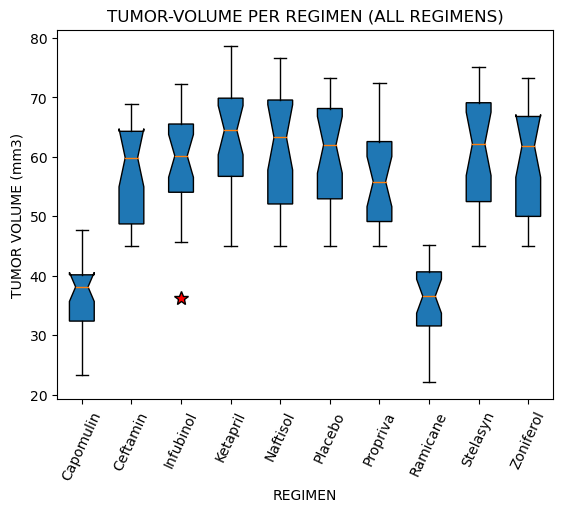

In [2701]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.boxplot.html whiskerprops={'markerfacecolor': 'red'}
for drug in treatment_list:
    all_tumor_vol_data.append(all_dict_of_values[drug.lower() + '_data_tumor_volume'])
plt.boxplot(all_tumor_vol_data, labels = treatment_list, showfliers=True, notch=True, patch_artist=True, flierprops={'marker': '*', 'markersize': 10, 'markerfacecolor': 'red'}) 
plt.ylabel('TUMOR VOLUME (mm3)')
plt.xlabel('REGIMEN')
plt.title('TUMOR-VOLUME PER REGIMEN (ALL REGIMENS)')
plt.xticks(rotation = 65)
plt.show()

## Line and Scatter Plots

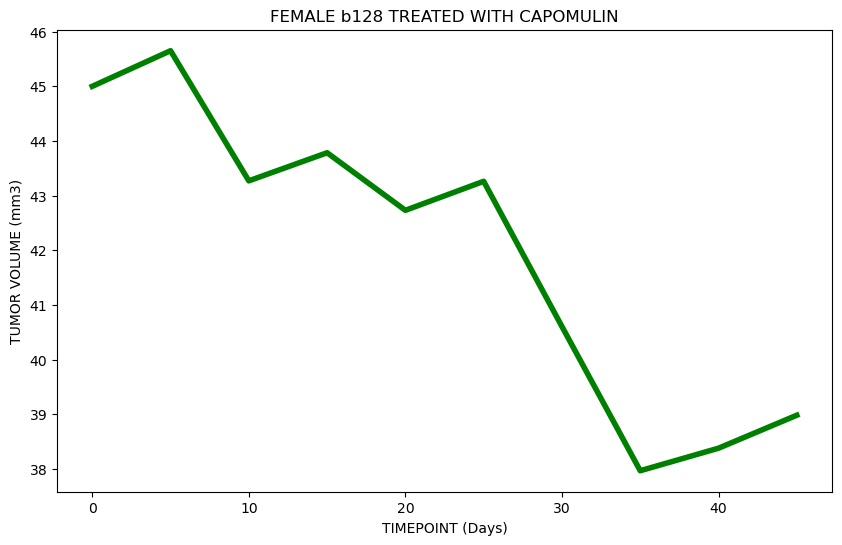

In [2702]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
only_capomulin_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(['Capomulin'])]
# only_capomulin_df = tumor_volume_df.loc[(tumor_volume_df["Drug Regimen"] == "Capomulin")]
# only_capomulin_df
female_b128 = complete_data_df[complete_data_df["Mouse ID"].isin(['b128'])]
plt.figure(figsize=(10,6))
plt.plot(female_b128['Timepoint'], female_b128['Tumor Volume (mm3)'], linewidth=4, color='g', markersize=5)
plt.xlabel('TIMEPOINT (Days)')
plt.ylabel('TUMOR VOLUME (mm3)')
plt.title('FEMALE b128 TREATED WITH CAPOMULIN')
plt.show()

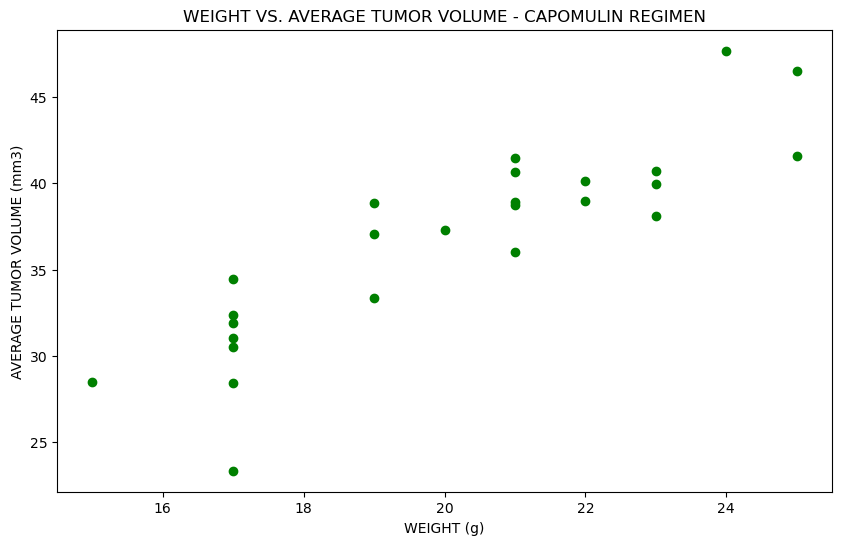

In [2703]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# only_capomulin_df = tumor_volume_df[tumor_volume_df["Drug Regimen"].isin(['Capomulin'])]
only_capomulin_df = tumor_volume_df.loc[(tumor_volume_df["Drug Regimen"] == "Capomulin")]
# only_capomulin_df
capomulin_mean_df = only_capomulin_df.groupby(["Mouse ID"]).mean()
plt.figure(figsize=(10,6))
plt.scatter(capomulin_mean_df['Weight (g)'], capomulin_mean_df['Tumor Volume (mm3)'],linewidths = 1, color='g', marker ="o")
plt.xlabel('WEIGHT (g)')
plt.ylabel('AVERAGE TUMOR VOLUME (mm3)')
plt.title('WEIGHT VS. AVERAGE TUMOR VOLUME - CAPOMULIN REGIMEN')
plt.show()

## Correlation and Regression

In [2704]:
"""
A correlation coefficient is a number between -1 and 1 
it tells you the strength and direction of a relationship between variables.
In other words, it reflects how similar the measurements of two or more variables are across a dataset.

The Pearson correlation measures the strength of the linear relationship between two variables.
Correlation Regression Analysis is a technique through which we can detect and analyze the relationship
between the independent variables as well as with the target value

https://realpython.com/numpy-scipy-pandas-correlation-python/
https://www.askpython.com/python/examples/correlation-regression-analysis
https://www.askpython.com/python/examples/correlation-matrix-in-python
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
https://tinyurl.com/4fmx6xyf

"""
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_df = capomulin_mean_df[['Weight (g)', 'Tumor Volume (mm3)']]

correlation = round(correlation_df.corr()['Tumor Volume (mm3)'][0], 3)

correlation1 = round([st.pearsonr(correlation_df['Weight (g)'],correlation_df['Tumor Volume (mm3)'])][0].statistic,3)

correlation2 = round(st.linregress(correlation_df['Weight (g)'],correlation_df['Tumor Volume (mm3)']).rvalue, 3)

correlation3 = round(np.corrcoef(correlation_df['Weight (g)'], correlation_df['Tumor Volume (mm3)'])[1][0], 3)

print(f"Correlation coefficient using the pandas corr() function = {correlation}")
print(f"Correlation coefficient using the stats.lineregress() function = {correlation1}")
print(f"Correlation coefficient with the scipy.stats.pearsonr() function = {correlation2}")
print(f"Correlation coefficientand using the np.corrcoef() function = {correlation3}")

# The corr() Pandas function and the Numpy.corrcoef() methods returned 2 values, 1 and 0.877 in relation to the other for each axis
# The scipy.stats.pearsonr method returned 2 values, the statistics and the pvalue.
# Per SciPy.org the pvalue indicates the probability of an uncorrelated system producing datasets with extreme correlation coefficient.
# The SciPy.org site states that the p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

Correlation coefficient using the pandas corr() function = 0.877
Correlation coefficient using the stats.lineregress() function = 0.877
Correlation coefficient with the scipy.stats.pearsonr() function = 0.877
Correlation coefficientand using the np.corrcoef() function = 0.877


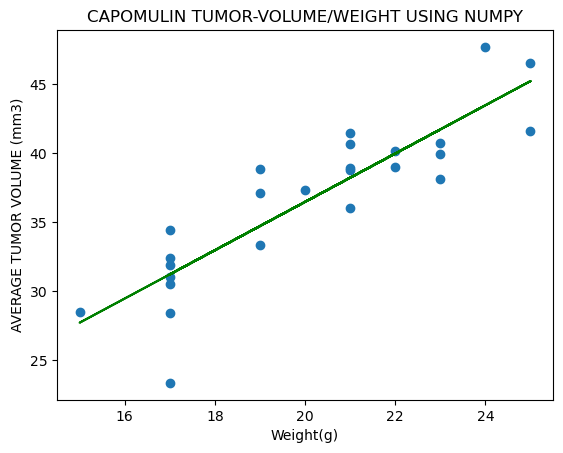

In [2705]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# numpy.polynomial.polynomial.polyfit(x, y, 1)  numpy.polyfit(x, y, 1)
np_linear_model = np.polyfit(capomulin_mean_df['Weight (g)'], capomulin_mean_df['Tumor Volume (mm3)'], 1, True)
# np_linear_model
y_axiz = capomulin_mean_df['Weight (g)'] * np_linear_model[0] + np_linear_model[1]  # used slope and intercept.
plt.scatter(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])
plt.plot(capomulin_mean_df['Weight (g)'], y_axiz ,color="g")
plt.xlabel('Weight(g)')
plt.ylabel('AVERAGE TUMOR VOLUME (mm3)')
plt.title('CAPOMULIN TUMOR-VOLUME/WEIGHT USING NUMPY')
plt.show()

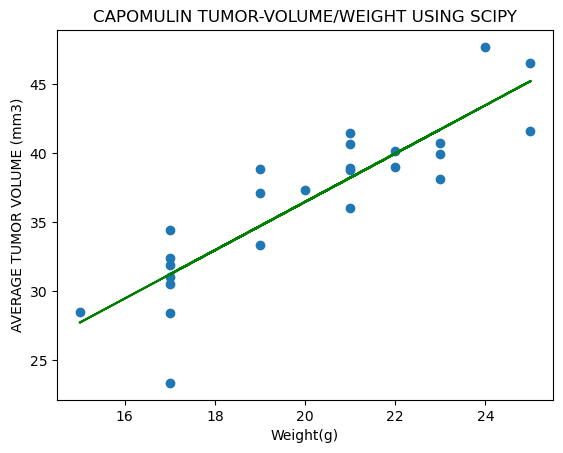

In [2706]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# scipy.stats.linregress(x,y)
scipy_linear_model = st.stats.linregress(capomulin_mean_df['Weight (g)'], capomulin_mean_df['Tumor Volume (mm3)'])
# scipy_linear_model
y_axiz = capomulin_mean_df['Weight (g)'] * scipy_linear_model[0] + scipy_linear_model[1]  # used slope and intercept from scipy_linear_model
plt.scatter(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])
plt.plot(capomulin_mean_df['Weight (g)'], y_axiz ,color="g")
plt.xlabel('Weight(g)')
plt.ylabel('AVERAGE TUMOR VOLUME (mm3)')
plt.title('CAPOMULIN TUMOR-VOLUME/WEIGHT USING SCIPY')
plt.show()

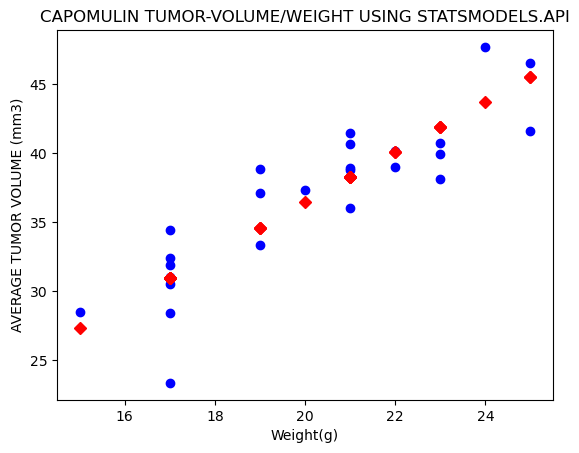

In [2707]:

# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# statsmodels.api.OLS(y, x)
statsmodels_linear_model = sm.OLS(capomulin_mean_df['Tumor Volume (mm3)'], capomulin_mean_df['Weight (g)']).fit()
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(statsmodels_linear_model, 0, ax=ax, vlines=False)
ax.set_ylabel('AVERAGE TUMOR VOLUME (mm3)')
ax.set_xlabel('Weight(g)')
ax.set_title('CAPOMULIN TUMOR-VOLUME/WEIGHT USING STATSMODELS.API')
fig.get_axes()[0].get_legend().remove()